In [2]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Output')
cur_date = "032522"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in files
var_imp_inflamm_covariates = data.frame(read_excel("031022_Significant_predictors_inflamm_covariates.xlsx"))
var_imp_lung_covariates = data.frame(read_excel("031022_Significant_predictors_lung_covariates.xlsx"))
var_imp_inflamm = data.frame(read_excel("032522_Significant_predictors_inflamm.xlsx"))
var_imp_lung = data.frame(read_excel("032522_Significant_predictors_lung.xlsx"))

In [3]:
head(var_imp_inflamm_covariates)
head(var_imp_lung_covariates)

,Feature,Passed_Filter,MeanDecreaseGini
,<chr>,<chr>,<dbl>
1,MPO,Yes,0.3473727
2,IL16,Yes,0.2393954
3,IP10,Yes,0.8386137
4,IL8,Yes,0.6418942
5,bEP_Chol,Yes,0.2451955
6,Eotaxin,Yes,0.1276909


,Feature,Passed_Filter,MeanDecreaseGini
,<chr>,<chr>,<dbl>
1,Chol,Yes,1.1647238
2,25OH_VitD,Yes,0.5657178
3,dHLan,Yes,0.6382048
4,IL15,Yes,0.7162409
5,IL8,Yes,0.1727281
6,bEP_Chol,Yes,0.3834127


In [4]:
#creating a col that specifies which the response variable before creating 1 df
var_imp_inflamm$Response = "Inflammatory"
var_imp_lung$Response = "Lung"
var_imp_inflamm_covariates$Response = "Inflammatory"
var_imp_lung_covariates$Response = "Lung"

var_imp_df = full_join(var_imp_inflamm, var_imp_lung)
var_imp_df_covariates = full_join(var_imp_inflamm_covariates, var_imp_lung_covariates)

var_imp_df$Response = factor(var_imp_df$Response, levels = c("Inflammatory", "Lung"))
var_imp_df_covariates$Response = factor(var_imp_df_covariates$Response, levels = c("Inflammatory", "Lung"))
head(var_imp_df)
head(var_imp_df_covariates)

Joining, by = c("Predictor", "Passed_Filter", "MeanDecreaseGini", "Response")
Joining, by = c("Feature", "Passed_Filter", "MeanDecreaseGini", "Response")


,Predictor,Passed_Filter,MeanDecreaseGini,Response
,<chr>,<chr>,<dbl>,<fct>
1,IP10,No,0.8793780,Inflammatory
2,IL8,No,0.7826965,Inflammatory
3,IL5,No,0.6637214,Inflammatory
4,MPO,No,0.5260840,Inflammatory
5,TNFb,No,0.4634499,Inflammatory
6,Chol,No,0.4183570,Inflammatory


,Feature,Passed_Filter,MeanDecreaseGini,Response
,<chr>,<chr>,<dbl>,<fct>
1,MPO,Yes,0.3473727,Inflammatory
2,IL16,Yes,0.2393954,Inflammatory
3,IP10,Yes,0.8386137,Inflammatory
4,IL8,Yes,0.6418942,Inflammatory
5,bEP_Chol,Yes,0.2451955,Inflammatory
6,Eotaxin,Yes,0.1276909,Inflammatory


# Without Covariates

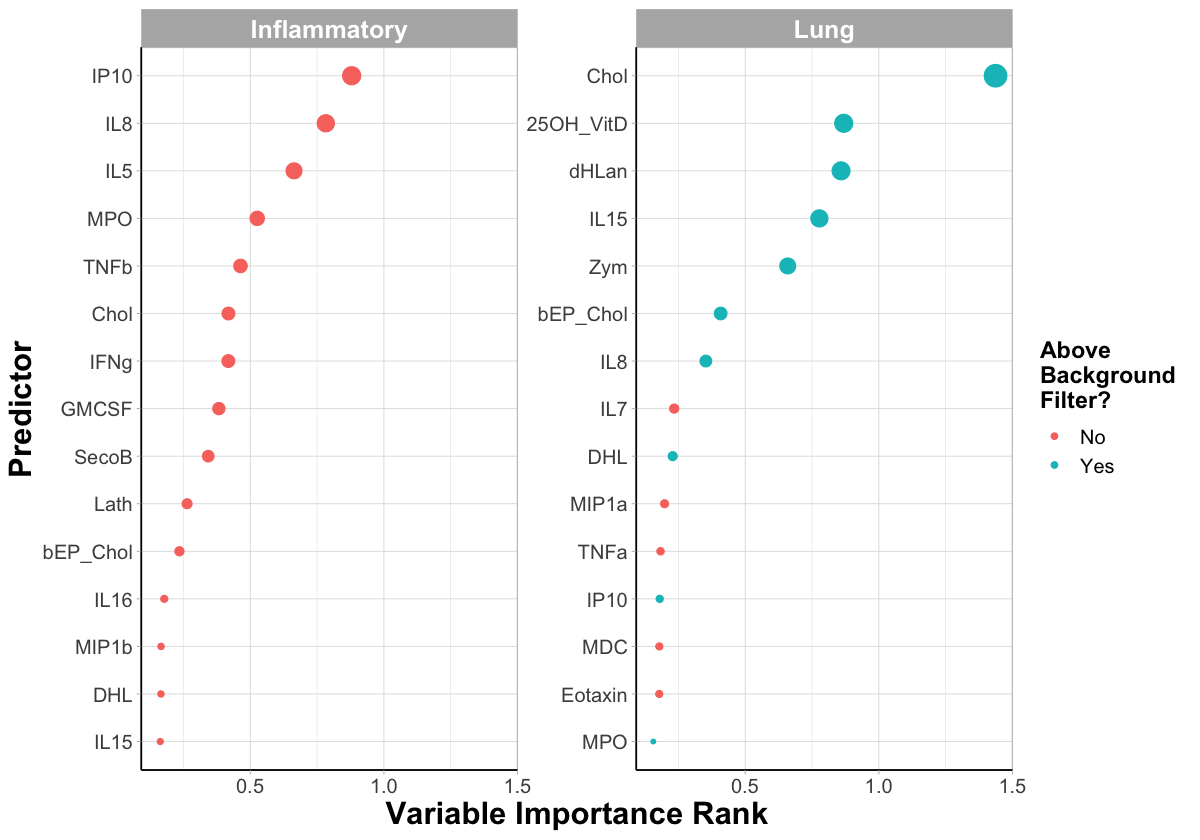

In [11]:
options(repr.plot.width=10, repr.plot.height=7) #changing size

#only plotting features w/ a mean decrease gini > 0.2
ggplot(data = var_imp_df %>% filter(MeanDecreaseGini > 0.15)) + 
  geom_point(aes(x = MeanDecreaseGini, y = reorder_within(Predictor, MeanDecreaseGini, Response), 
                 color = Passed_Filter, size = MeanDecreaseGini)) + 

  facet_wrap(~Response, scales = 'free_y') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor', color = "Above \nBackground \nFilter?") + #changing axis labels 
  
  #this removes response variable from y axes
  scale_y_reordered() +
  #removing size legend
  guides(size = "none")

# With Covariates

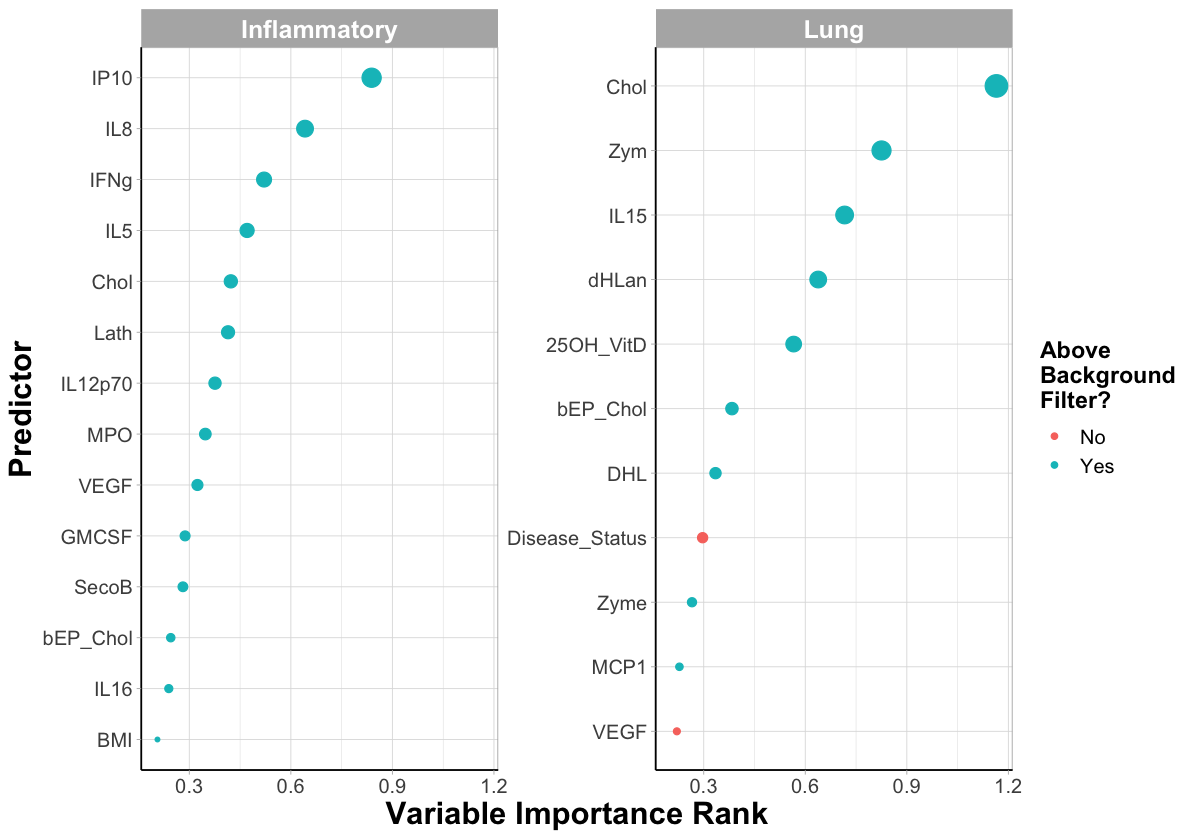

In [11]:
options(repr.plot.width=10, repr.plot.height=7) #changing size

#only plotting features w/ a mean decrease gini > 0.2
ggplot(data = var_imp_df_covariates %>% filter(MeanDecreaseGini > 0.2)) + 
  geom_point(aes(x = MeanDecreaseGini, y = reorder_within(Feature, MeanDecreaseGini, Response), 
                 color = Passed_Filter, size = MeanDecreaseGini)) + 

  facet_wrap(~Response, scales = 'free_y') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor', color = "Above \nBackground \nFilter?") + #changing axis labels 
  
  #this removes response variable from y axes
  scale_y_reordered() +
  #removing size legend
  guides(size = "none")